In [1]:
import Simulation.pys.diff_sim.emulator_NN as emulator_NN
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

cls2gls_emulator loaded
cosmopara2cls_emulator loaded
Av_emulator loaded
Photoz_emulator loaded


In [2]:
def delete_mono(one_data):
    data_cl = one_data.reshape(-1, 1025)[:, 1:]
    cl_part = np.concatenate(data_cl)
    return cl_part

In [3]:
cls = np.load("../../data/emulator/training_set/cls_auto_only.npy")[:, 5:]
cls = np.array([delete_mono(c) for c in cls])
cls = torch.from_numpy(cls).float().requires_grad_()

cosmppara= np.load("../../data/emulator/training_set/cls_auto_only.npy")[:, :5]
cosmppara = torch.from_numpy(cosmppara).float().requires_grad_()

gls = np.load("../../data/emulator/training_set/gls_auto_only.npy")[:, 5:]
gls = np.array([delete_mono(c) for c in gls])
gls = torch.from_numpy(gls).float().requires_grad_() 


In [4]:
gls_pred = emulator_NN.cls2gls_emulator(cls)

In [5]:
np.shape(gls_pred)

torch.Size([6684, 40960])

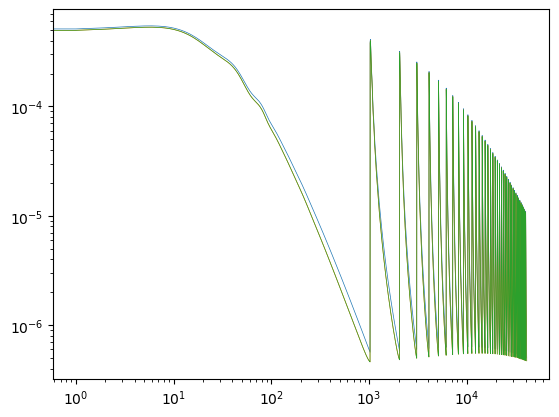

In [6]:
plt.loglog(cls.detach().numpy()[0], linewidth = 0.5)
plt.loglog(gls_pred.detach().numpy()[0],linewidth = 0.5)
plt.loglog(gls.detach().numpy()[0],linewidth = 0.5)

In [7]:
# def emulator_forward(x):
#     return emulator_NN.cls2gls_emulator(x)
# J = torch.autograd.functional.jacobian(emulator_forward, emulator_NN.cls_f)

In [8]:
cls_pred = emulator_NN.cosmopara2cls_emulator(cosmppara)

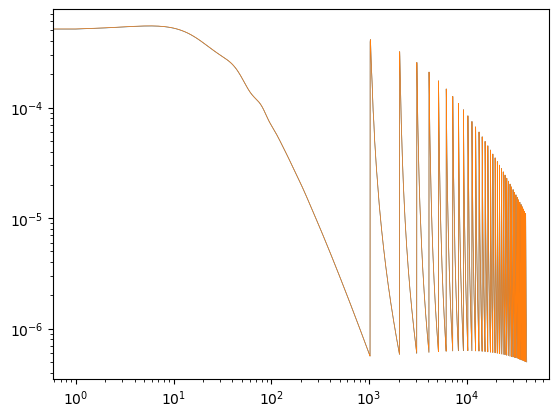

In [9]:
plt.loglog(cls.detach().numpy()[0], linewidth = 0.5)
plt.loglog(cls_pred.detach().numpy()[0],linewidth = 0.5)

In [10]:
df = pd.read_csv("../../data/emulator/training_set/Dust_law_training.csv", index_col=0)

In [11]:
law_para=np.array(df[['p_ccm89', 'p_od94', 'p_fitz99', 'w']])
ugrizy=np.array(df[["u","g","r","i", "z",'y']])

In [12]:
law_para = torch.from_numpy(law_para).float().requires_grad_()

In [13]:
ugrizy_pred = emulator_NN.Av_emulator(law_para)

In [14]:
ugrizy_pred.detach().numpy()-ugrizy

array([[ 1.60737424e-04,  1.75538016e-04,  2.09506655e-05,
         3.91963246e-05,  3.72610788e-05,  5.24249736e-05],
       [-1.88750825e-04,  9.07820117e-05, -7.07825597e-05,
        -1.06771434e-05, -4.73464049e-06, -2.61755674e-06],
       [-5.43203695e-05,  1.51844513e-05, -4.13139515e-05,
         2.50700795e-05,  1.41234062e-05, -1.17789774e-05],
       ...,
       [ 6.92531801e-04,  4.63355615e-05,  2.33805290e-04,
         1.02463846e-04,  6.94415365e-05,  2.86541791e-05],
       [-1.22428628e-04, -7.98544975e-05,  3.86366366e-05,
         6.99172388e-05,  4.35978978e-05,  4.83592707e-06],
       [ 8.07351415e-06,  2.81862415e-05, -7.97305824e-06,
         2.63721891e-05,  4.64541319e-06,  1.73254999e-05]],
      shape=(28739, 6))

In [15]:
ugrizy_RBV_Rv=np.array(df[["u","g","r","i", "z",'y','EBV_in', "Rv","EBV_out" ]])

In [16]:
ugrizy_RBV_Rv = torch.from_numpy(ugrizy_RBV_Rv).float().requires_grad_()

In [17]:
label_z = []
for i in range(40):
    label_z.extend([str((i,j)) for j in range(7)])
photoz_d = np.array(df[label_z])
photoz_d = photoz_d.reshape((photoz_d.shape[0]*40,7))
photoz_d = photoz_d/np.sum(photoz_d, axis=1)[0]
photoz_d = photoz_d.reshape((-1,40*7))
np.shape(photoz_d)


(28739, 280)

In [18]:
photoz_pred = emulator_NN.Photoz_emulator(ugrizy_RBV_Rv)

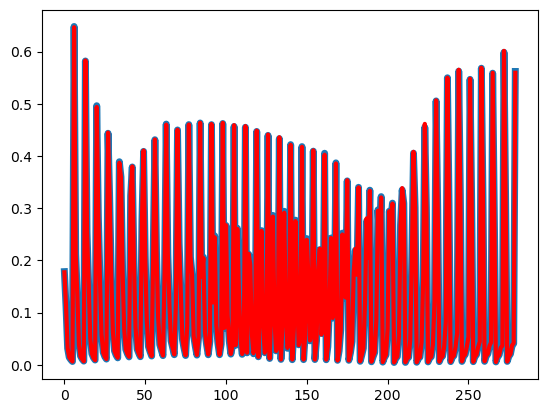

In [26]:
plt.plot(photoz_pred[2].detach().numpy()[:],linewidth = 5)
plt.plot(photoz_d[2][:], linewidth = 3,color="red")

In [27]:
diff=photoz_pred.detach().numpy()[:]-photoz_d[:]

In [38]:
np.mean(diff*100, axis=0)

array([-1.34795678e-02, -1.45784188e-02, -6.03303992e-03, -3.83085481e-03,
       -1.41549386e-03, -1.52281867e-03,  4.07345809e-02, -1.34271344e-02,
       -1.39578612e-02, -6.30598886e-03, -3.97489700e-03, -1.34233947e-03,
       -9.98977006e-04,  3.98804702e-02, -1.30706760e-02, -9.77491117e-03,
       -4.92409716e-03, -4.68707951e-03, -1.35796682e-03, -8.62597635e-04,
        3.45517558e-02, -1.34518904e-02, -4.62737995e-03, -4.40588345e-03,
       -3.67030017e-03, -1.25244215e-03, -8.33706507e-04,  2.81180442e-02,
       -1.26028720e-02,  3.48934399e-03, -3.26730619e-03, -4.35044132e-03,
       -1.24586911e-03, -1.43565167e-04,  1.79940715e-02, -1.27684993e-02,
       -1.04221524e-03,  7.70703048e-04, -5.68824290e-03, -6.70840266e-04,
       -3.29314460e-04,  1.96059087e-02, -1.26888944e-02,  1.61048446e-03,
        5.15136841e-04, -1.23277268e-03, -9.66640477e-04, -2.72714855e-04,
        1.29120099e-02, -1.25430598e-02,  4.09841104e-03, -1.55614311e-03,
        9.66171031e-05, -

In [32]:
np.min(diff)

np.float64(-0.022279369606971744)

In [41]:
2e8/40/(12*512**2)

1.5894571940104167